In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cluster_model import ClusterModel
from datetime import timedelta
import pickle
import seaborn as sns

In [2]:
with open('../data/station_data/2024 model/v2/tph_4/data.pickle', 'rb') as f:
    station_data = pickle.load(f)

In [ ]:
cluster_model = ClusterModel(station_data=station_data, in_transit=[], tph=4)
horizontal_squares, vertical_squares, clusters = cluster_model.cluster_stations(0.004)
cluster_model.init_clusters()
cluster_model.init_state(path='../data/station_data/status_at_time/2024_6_20_2:19.csv', time=timedelta(hours=2))
# cluster_model.init_by_3()


# cluster_model.show_bikes()

# num_stations = [len(cluster) for cluster in clusters]
# sns.heatmap(np.array(num_stations).reshape((vertical_squares, horizontal_squares)))

3:00:00
64 in transit
218 failures
67 critical failures
174 total trips
-------------------
3:15:00
63 in transit
248 failures
71 critical failures
225 total trips
-------------------
3:30:00
67 in transit
275 failures
75 critical failures
275 total trips
-------------------
3:45:00
68 in transit
297 failures
80 critical failures
326 total trips
-------------------
4:00:00
55 in transit
320 failures
81 critical failures
390 total trips
-------------------
4:15:00
52 in transit
343 failures
87 critical failures
436 total trips
-------------------
4:30:00
65 in transit
368 failures
90 critical failures
474 total trips
-------------------
4:45:00
90 in transit
407 failures
97 critical failures
530 total trips
-------------------
5:00:00
93 in transit
445 failures
103 critical failures
609 total trips
-------------------
5:15:00
159 in transit
499 failures
105 critical failures
689 total trips
-------------------
5:30:00
233 in transit
548 failures
111 critical failures
813 total trips
---

0

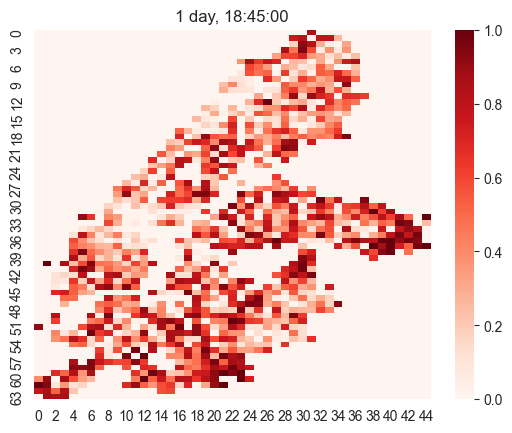

In [5]:
end_time = cluster_model.curr_time + timedelta(hours=40)
image_number = 0
while cluster_model.curr_time < end_time:
    cluster_model.sim()
    # cluster_model.sim_by_3()
    print(cluster_model.curr_time)
    print(len(cluster_model.in_transit), 'in transit')
    print(cluster_model.failures, 'failures')
    print(cluster_model.critical_failures, 'critical failures')
    print(cluster_model.total_trips, 'total trips')
    print('-------------------')
    if image_number < 10:
        t = f'000{image_number}'
    elif image_number < 100:
        t = f'00{image_number}'
    elif image_number < 1000:
        t = f'0{image_number}'
    else:
        t = f'{image_number}'
    # cluster_model.show_failures(save=True, name=f'{t}')
    # cluster_model.show_bikes(save=True, name=f'{t}')
    cluster_model.show_fill_percent(save=True, name=f'{t}')
    image_number += 1
    
# os.system('magick images/failures/*.png gifs/failures_15v2.gif')
# os.system('magick images/bikes/*.png gifs/bikesv2.gif')
os.system('magick images/fill/*.png gifs/fillv2.gif')


In [2]:
import base64
gif_path = 'gifs/failures_15.gif'
b64 = base64.b64encode(open(gif_path,'rb').read()).decode('ascii')
display(HTML(f'<img src="data:image/gif;base64,{b64}" />'))

ModuleNotFoundError: No module named 'HTML'

In [28]:
cluster_model.sim()
print(cluster_model.curr_time)
print(len(cluster_model.in_transit))
print(cluster_model.failures)
print(cluster_model.critical_failures)

13:45:00
1435
986
37
